In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
df_raw=pd.read_csv('QoSvsQoESyn.csv')

In [3]:
# Display first five rows
df_raw.head()

cellAccessibilityRankDesc  crmInboundInteractionCount
0                ACCEPTABLE                           1
1                ACCEPTABLE                           1
2                ACCEPTABLE                           1
3                ACCEPTABLE                           1
4                ACCEPTABLE                           1

In [4]:
# shape of the dataset
df_raw.shape

(3047, 2)

In [5]:
#Checking the null values in the dataframe
df_raw.isnull().sum()

cellAccessibilityRankDesc     0
crmInboundInteractionCount    0
dtype: int64

In [6]:
# information about dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 2 columns):
cellAccessibilityRankDesc     3047 non-null object
crmInboundInteractionCount    3047 non-null int64
dtypes: int64(1), object(1)
memory usage: 47.7+ KB


In [7]:
# Statistical description of dataframe
df_raw.describe() 

crmInboundInteractionCount
count                 3047.000000
mean                     0.985560
std                      0.780879
min                      0.000000
25%                      0.000000
50%                      1.000000
75%                      2.000000
max                      2.000000

In [8]:
# Extraxting a unique values of 'cellAccessibilityRankDesc' Column
a=df_raw['cellAccessibilityRankDesc'].unique()
print(a)
len(a)

['ACCEPTABLE' 'EXCELLENT' 'GOOD']


3

In [9]:
#Finding the count of QoS
df_raw['cellAccessibilityRankDesc'].value_counts()

GOOD          1199
ACCEPTABLE     983
EXCELLENT      865
Name: cellAccessibilityRankDesc, dtype: int64

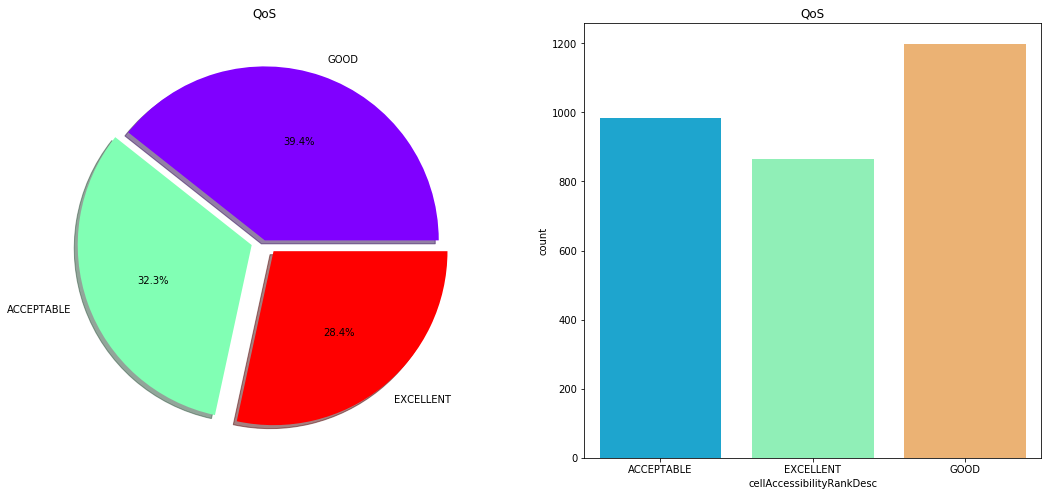

In [10]:
#plotting the count of QoS
f,ax=plt.subplots(1,2,figsize=(18,8))
df_raw['cellAccessibilityRankDesc'].value_counts().plot.pie(explode=[0,0.08,0.08],autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='rainbow')
ax[0].set_title('QoS')
ax[0].set_ylabel('')
sns.countplot('cellAccessibilityRankDesc',data=df_raw,ax=ax[1], palette='rainbow')
ax[1].set_title('QoS')
plt.show()

In [11]:
#Finding the count of the user experiences
df_raw['crmInboundInteractionCount'].value_counts()

1    1189
0     951
2     907
Name: crmInboundInteractionCount, dtype: int64

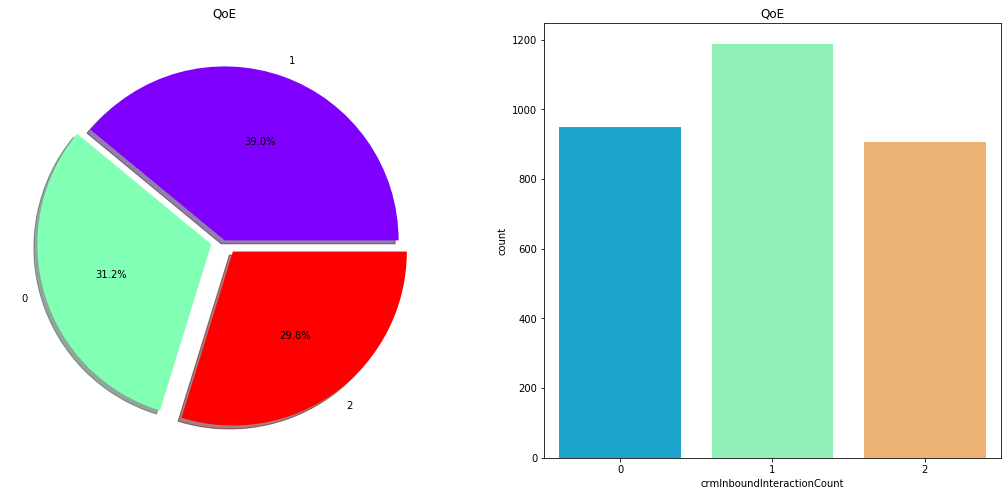

In [12]:
#Plotting the count of QoE
f,ax=plt.subplots(1,2,figsize=(18,8))
df_raw['crmInboundInteractionCount'].value_counts().plot.pie(explode=[0,0.08,0.08],autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='rainbow')
ax[0].set_title('QoE')
ax[0].set_ylabel('')
sns.countplot('crmInboundInteractionCount',data=df_raw,ax=ax[1], palette='rainbow')
ax[1].set_title('QoE')
plt.show()

In [13]:
#Finding the unique values of user experience for each parameter of QoS
df_raw.groupby('cellAccessibilityRankDesc')['crmInboundInteractionCount'].unique()

cellAccessibilityRankDesc
ACCEPTABLE    [1, 2, 0]
EXCELLENT     [0, 1, 2]
GOOD          [2, 1, 0]
Name: crmInboundInteractionCount, dtype: object

In [14]:
#Finding the count of user experience in each service quality
df_raw.groupby(['cellAccessibilityRankDesc', 'crmInboundInteractionCount']).size()

cellAccessibilityRankDesc  crmInboundInteractionCount
ACCEPTABLE                 0                              55
                           1                             884
                           2                              44
EXCELLENT                  0                             767
                           1                              33
                           2                              65
GOOD                       0                             129
                           1                             272
                           2                             798
dtype: int64

In [15]:
#Drawing crosstab for the QoS and QoE
pd.crosstab(df_raw['cellAccessibilityRankDesc'],df_raw['crmInboundInteractionCount'],margins=True).style.background_gradient(cmap='summer_r')

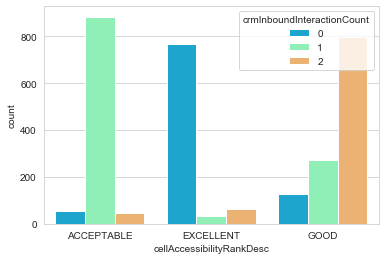

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='cellAccessibilityRankDesc', hue='crmInboundInteractionCount', data=df_raw, palette='rainbow')

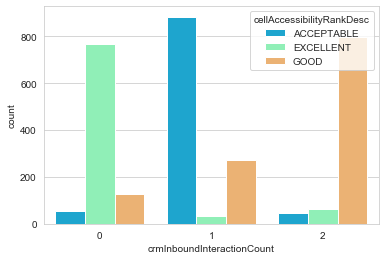

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='crmInboundInteractionCount', hue='cellAccessibilityRankDesc', data=df_raw, palette='rainbow')

In [18]:
#Finding the average value of user experience for each of the service qualities
df_raw[['cellAccessibilityRankDesc', 'crmInboundInteractionCount']].groupby(['cellAccessibilityRankDesc']).mean().sort_values( by='crmInboundInteractionCount', ascending=False)

crmInboundInteractionCount
cellAccessibilityRankDesc                            
GOOD                                         1.557965
ACCEPTABLE                                   0.988810
EXCELLENT                                    0.188439

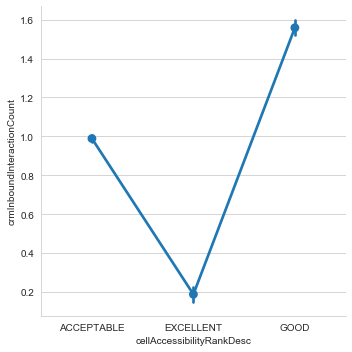

In [19]:
#Using factorplot to find the factor for the user rating for each of the service quality
sns.factorplot('cellAccessibilityRankDesc','crmInboundInteractionCount',data=df_raw)
plt.show()

## Chi-square test for independence
###### The Chi Square statistic is commonly used for testing relationships between categorical variables.
###### This test returns a 'p' value if p<0.05 then variables are correlated if not (p>0.05) then variables are Independent

### Why Chi-square ?
#### This test helps to determine whether the outpout variable is dependent or independent of input variable
#### If independent, then the input variable is a candidate for a feature that may be irrelevant to the 
#### problem and removed from the dataset

In [20]:
import scipy.stats

In [21]:
table = pd.crosstab(df_raw['cellAccessibilityRankDesc'], df_raw['crmInboundInteractionCount'])

In [22]:
chi2, p, dof, expected= scipy.stats.chi2_contingency(table.values)

In [23]:
print('chi-square statistic: ', chi2)
print('p-value: ', p)

chi-square statistic:  3192.2255875828437
p-value:  0.0


  #### Note:  since p value is 0 so we reject the null hypothsis and conclde that the variables are correlated
    

### When to use chi-square
#####  When using a two categorical feature and trying to conclude to accept or reject null hypothesis chi-Square test works best
##### The Chi-Square test is most useful when analyzing cross tabulations of survey response data.
##### Because cross tabulations reveal the frequency and percentage of responses to questions by 
##### various segments or categories of respondents (gender, profession, education level, etc.)

### Limitations of chi-Square
##### . Cannot be used when samples are matched or related
##### . It wont give much information about strength of the relationship

#### Chi-Square formula:
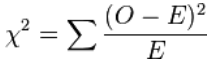

O = the Observed (actual) value,  
E = the Expected value

In [24]:
# Creating a copy of dataset
copy_df=df_raw.copy(deep=True)
Copy_df = pd.DataFrame(df_raw, columns=['cellAccessibilityRankDesc'])
Copy_df.head()

cellAccessibilityRankDesc
0                ACCEPTABLE
1                ACCEPTABLE
2                ACCEPTABLE
3                ACCEPTABLE
4                ACCEPTABLE

In [25]:
# applying get dummy method
dum_df = pd.get_dummies(Copy_df, columns=["cellAccessibilityRankDesc"] )

In [26]:
dum_df

cellAccessibilityRankDesc_ACCEPTABLE  \
0                                        1   
1                                        1   
2                                        1   
3                                        1   
4                                        1   
...                                    ...   
3042                                     0   
3043                                     0   
3044                                     0   
3045                                     0   
3046                                     0   

      cellAccessibilityRankDesc_EXCELLENT  cellAccessibilityRankDesc_GOOD  
0                                       0                               0  
1                                       0                               0  
2                                       0                               0  
3                                       0                               0  
4                                       0                               0  
...                                   ...                             ...  
3042                                    0                               1  
3043                                    0                               1  
3044                                    0                               1  
3045                                    0                               1  
3046                                    0                               1  

[3047 rows x 3 columns]

In [27]:
df_raw.drop('cellAccessibilityRankDesc',axis=1,inplace=True)
df_raw.head()

crmInboundInteractionCount
0                           1
1                           1
2                           1
3                           1
4                           1

In [30]:
new_data=dum_df.join(df_raw)
new_data.head()

cellAccessibilityRankDesc_ACCEPTABLE  cellAccessibilityRankDesc_EXCELLENT  \
0                                     1                                    0   
1                                     1                                    0   
2                                     1                                    0   
3                                     1                                    0   
4                                     1                                    0   

   cellAccessibilityRankDesc_GOOD  crmInboundInteractionCount  
0                               0                           1  
1                               0                           1  
2                               0                           1  
3                               0                           1  
4                               0                           1

### Normal Distribution Equation:
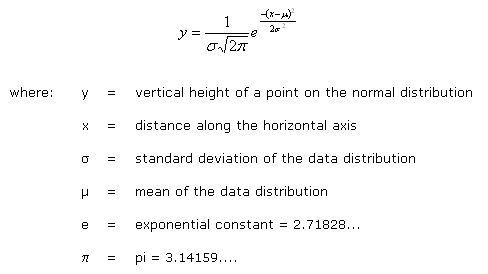

The height of a normal distribution (y) can be defined by its corresponding value of x

## Kurtosis
####  It is a measure of the “tailedness" i.e. descriptor of shape of probability distribution of a real-valued random variable. 
#### In simple terms, one can say it is a measure of how heavy tail is compared to a normal distribution.

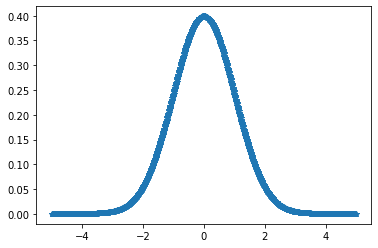

In [4]:
# Example
# Graph using numpy.linspace()  
# finding kurtosis 
  
from scipy.stats import kurtosis 
import numpy as np  
import pylab as p  
  
x1 = np.linspace( -5, 5, 1000 ) # start,end,step
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  )# Normal Distribution 
  
p.plot(x1, y1, '*') 

In [3]:
print( '\nKurtosis for normal distribution :', kurtosis(y1)) 
  
print( '\nKurtosis for normal distribution :',  
      kurtosis(y1, fisher = False)) 
  
print( '\nKurtosis for normal distribution :',  
      kurtosis(y1, fisher = True)) 


Kurtosis for normal distribution : -0.3073930877422071

Kurtosis for normal distribution : 2.692606912257793

Kurtosis for normal distribution : -0.3073930877422071


### Why kurtosis?. and it's Advantage
##### It is used to describe the extreme values in one versus the other tail. 
##### It is actually the measure of outliers present in the distribution . 
##### High kurtosis in a data set is an indicator that data has heavy tails or outliers. 
##### If there is a high kurtosis, then, we need to investigate why do we have so many outliers.

## Skewness
##### Skewness is a measure of the asymmetry of a data distribution. 
##### Skewness is asymmetry in a statistical distribution, in which the 
##### curve appears distorted or skewed either to the left or to the right.

#### Note:
skewness = 0 : normally distributed.,
skewness > 0 : more weight in the left tail of the distribution.,
skewness < 0 : more weight in the right tail of the distribution. 

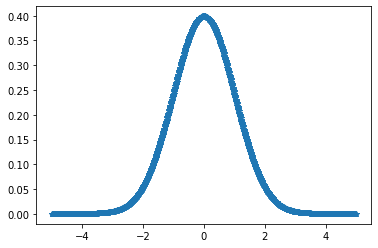

In [5]:
# Example

# Graph using numpy.linspace()  
# finding Skewness 
  
from scipy.stats import skew 
import numpy as np  
import pylab as p  
  
x1 = np.linspace( -5, 5, 1000 ) # start,end,step
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  ) # normal distribution
  
p.plot(x1, y1, '*') 

In [31]:
print( '\nSkewness for data : ', skew(y1)) 


Skewness for data :  2.184420130939647


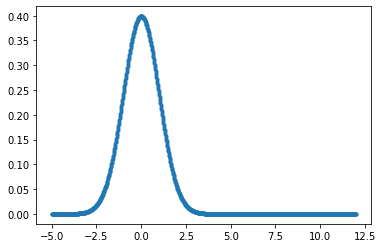

In [12]:
# Examples
# Graph using numpy.linspace()  
# finding Skewness 
  
from scipy.stats import skew 
import numpy as np  
import pylab as p  
  
x1 = np.linspace( -5, 12, 1000 ) # Start, end,step
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  )#Normal Distribution 
  
p.plot(x1, y1, '.') 

In [13]:
print( '\nSkewness for data : ', skew(y1))


Skewness for data :  1.917677776148478


In [34]:
# Example
# finding Skewness 
  
from scipy.stats import skew 
import numpy as np  
  
# random values based on a normal distribution 
x = np.random.normal(0, 2, 10000) 
  
print ("X : \n", x) 
  
print('\nSkewness for data : ', skew(x)) 

X : 
 [ 1.95727728  0.89441506 -0.20272204 ...  2.09833706  0.88014348
 -0.96088499]

Skewness for data :  0.010444567181681743


#### Note:
 If skewness is not close to zero, then your data set is not normally distributed.

### About Skewness and Kurtosis

##### If skewness is less than -1 or greater than 1, the distribution is highly skewed.
##### If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
##### If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

#### Positive Skewness:
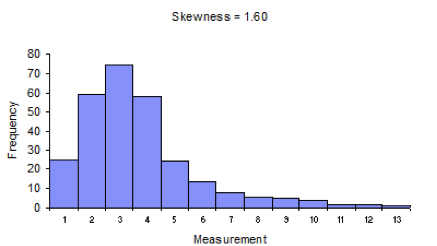

#### Negetive Skewness:
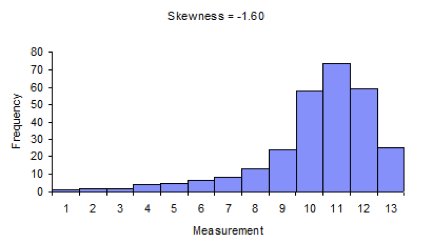

#### Formula for Skewness:
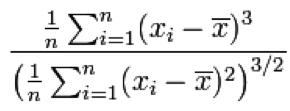

where x̄ is the sample mean

#### Kurtosis
##### Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve.

###### Positive Kurtosis(too much peak):
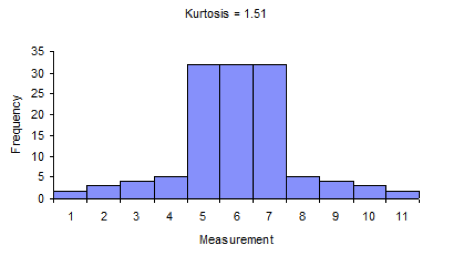

##### Negetive Kurtosis(too much flat):
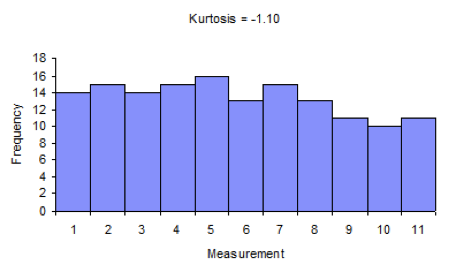

#### Formula of Kurtosis:
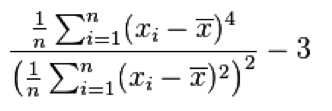

Here, x̄ is the sample mean. The "minus 3" at the end of this formula is often explained as a correction 
make the kurtosis of the normal distribution equal to zero, as the kurtosis is 3 for a normal distribution.